# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [87]:
#conda update conda

In [88]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.5
Pandas version: 1.4.4
Seaborn version: 0.11.2
Matplotlib version: 3.5.2
Sklearn version: 1.0.2
Statsmodels version: 0.13.2


## Read the data from the '.csv' file as a monthly Time Series.

In [89]:
df = pd.read_csv('train_IxoE5JN.csv', parse_dates = ['datetime'], index_col = 'datetime')
df.drop("row_id",axis=1,inplace=True)
df.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


## Plot the Time Series to understand the behaviour of the data.

In [90]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

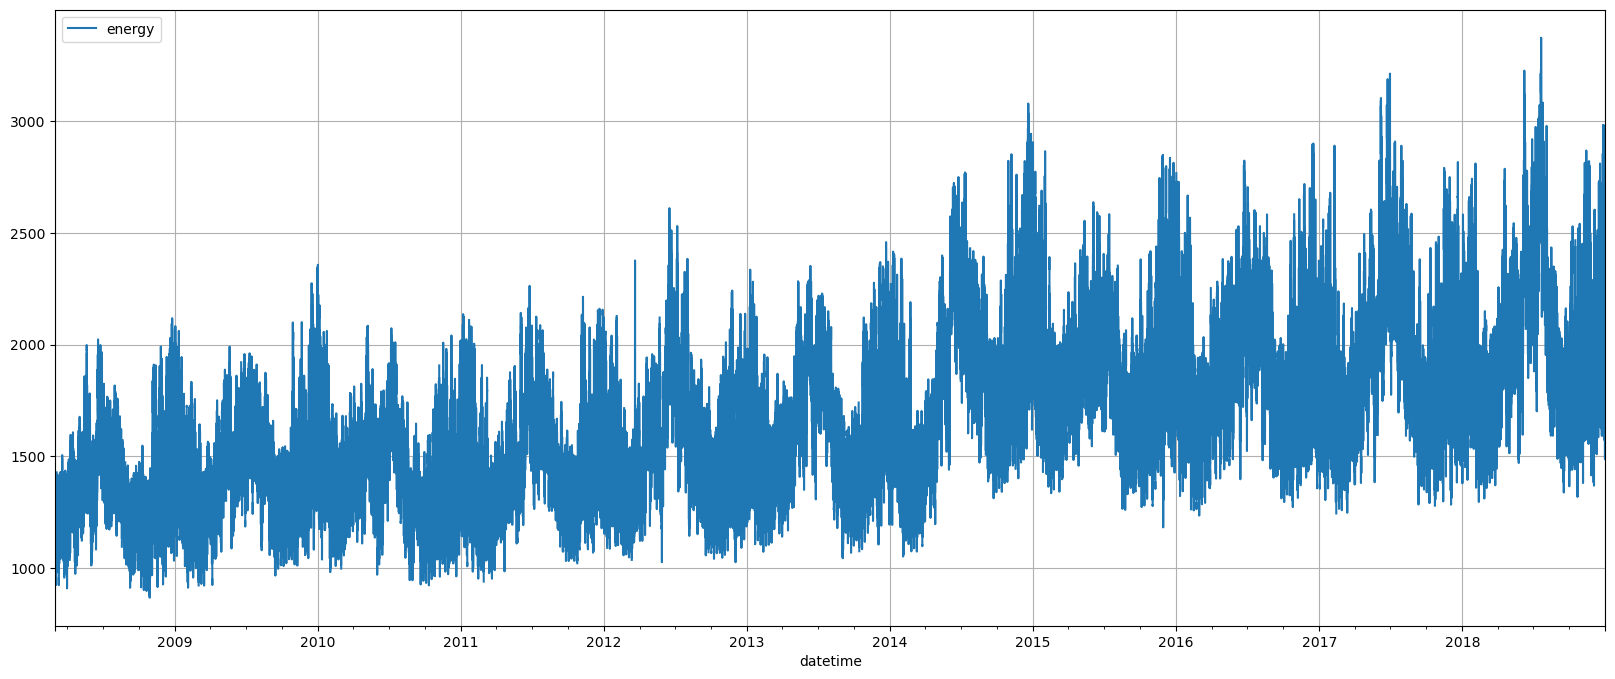

In [91]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [92]:
df.describe()

,energy
count,93092.000000
mean,1702.995014
std,369.322103
min,866.388600
25%,1431.541100
50%,1654.465800
75%,1935.993450
max,3374.399600


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Decompose the Time Series and plot the different components.

In [93]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [94]:
df=df.interpolate()

### Additive Decomposition

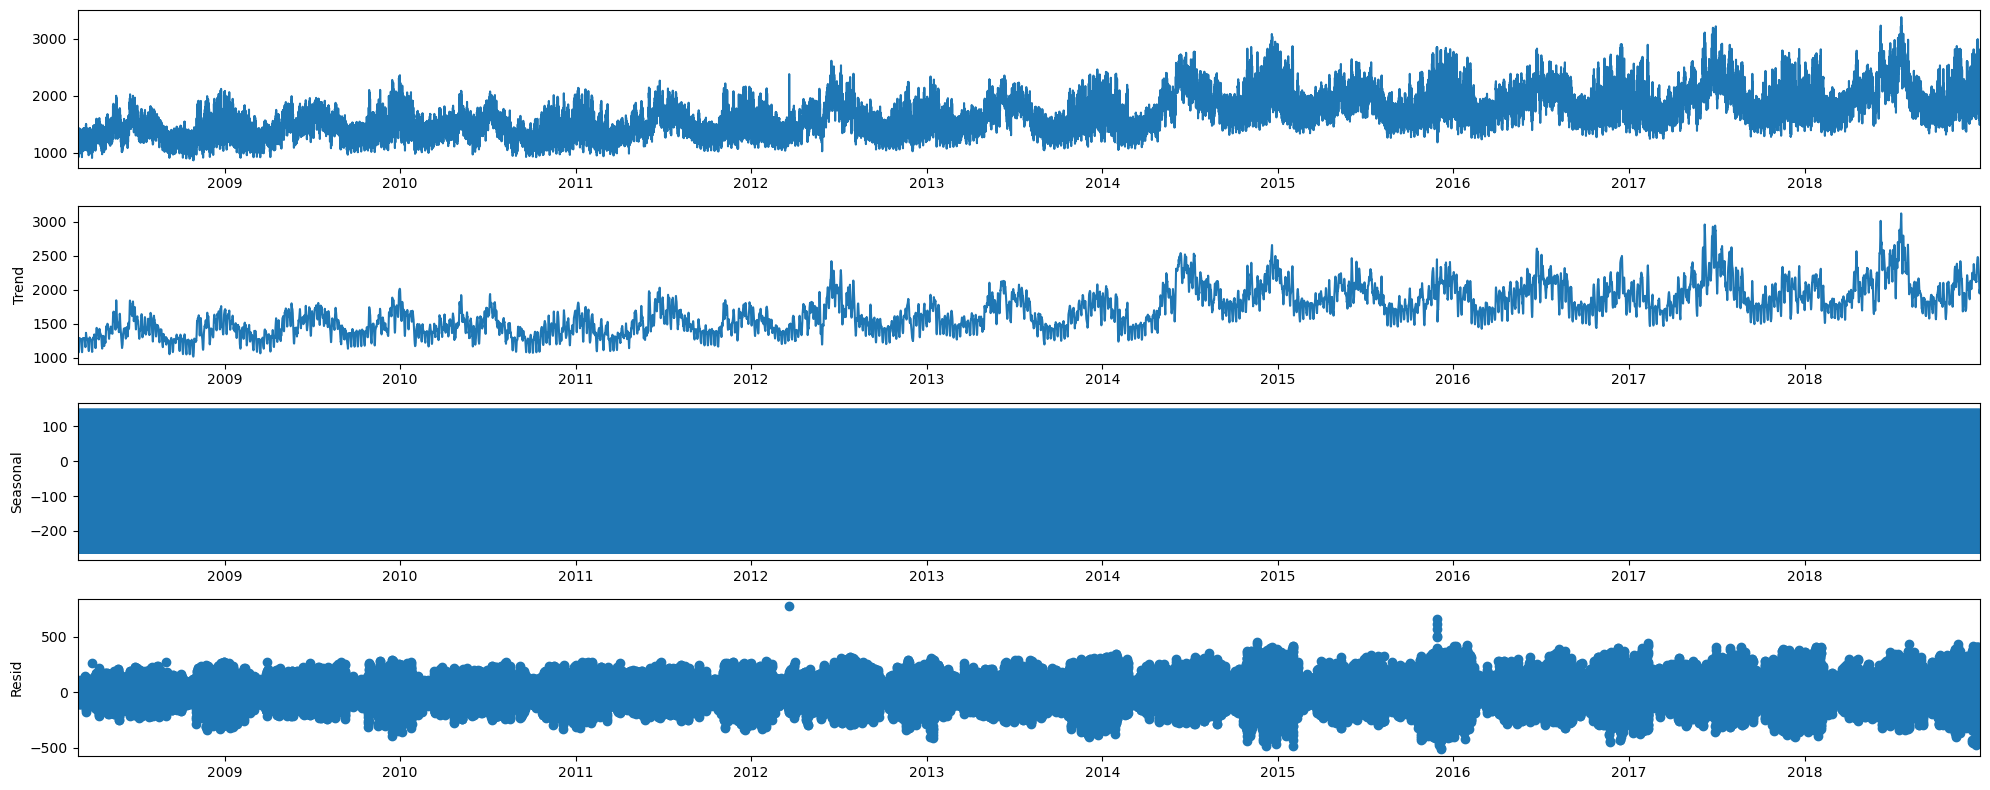

In [95]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.

In [96]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(24),'\n')
print('Seasonality','\n',seasonality.head(24),'\n')
print('Residual','\n',residual.head(24),'\n')

Trend 
 datetime
2008-03-01 00:00:00            NaN
2008-03-01 01:00:00            NaN
2008-03-01 02:00:00            NaN
2008-03-01 03:00:00            NaN
2008-03-01 04:00:00            NaN
2008-03-01 05:00:00            NaN
2008-03-01 06:00:00            NaN
2008-03-01 07:00:00            NaN
2008-03-01 08:00:00            NaN
2008-03-01 09:00:00            NaN
2008-03-01 10:00:00            NaN
2008-03-01 11:00:00            NaN
2008-03-01 12:00:00    1261.995480
2008-03-01 13:00:00    1259.766156
2008-03-01 14:00:00    1259.061844
2008-03-01 15:00:00    1257.950062
2008-03-01 16:00:00    1256.548813
2008-03-01 17:00:00    1254.780656
2008-03-01 18:00:00    1252.037156
2008-03-01 19:00:00    1246.920750
2008-03-01 20:00:00    1239.440656
2008-03-01 21:00:00    1232.084094
2008-03-01 22:00:00    1226.248625
2008-03-01 23:00:00    1221.517562
Name: trend, dtype: float64 

Seasonality 
 datetime
2008-03-01 00:00:00    -89.795762
2008-03-01 01:00:00   -174.208045
2008-03-01 02:00:00   

### Multiplicative Decomposition

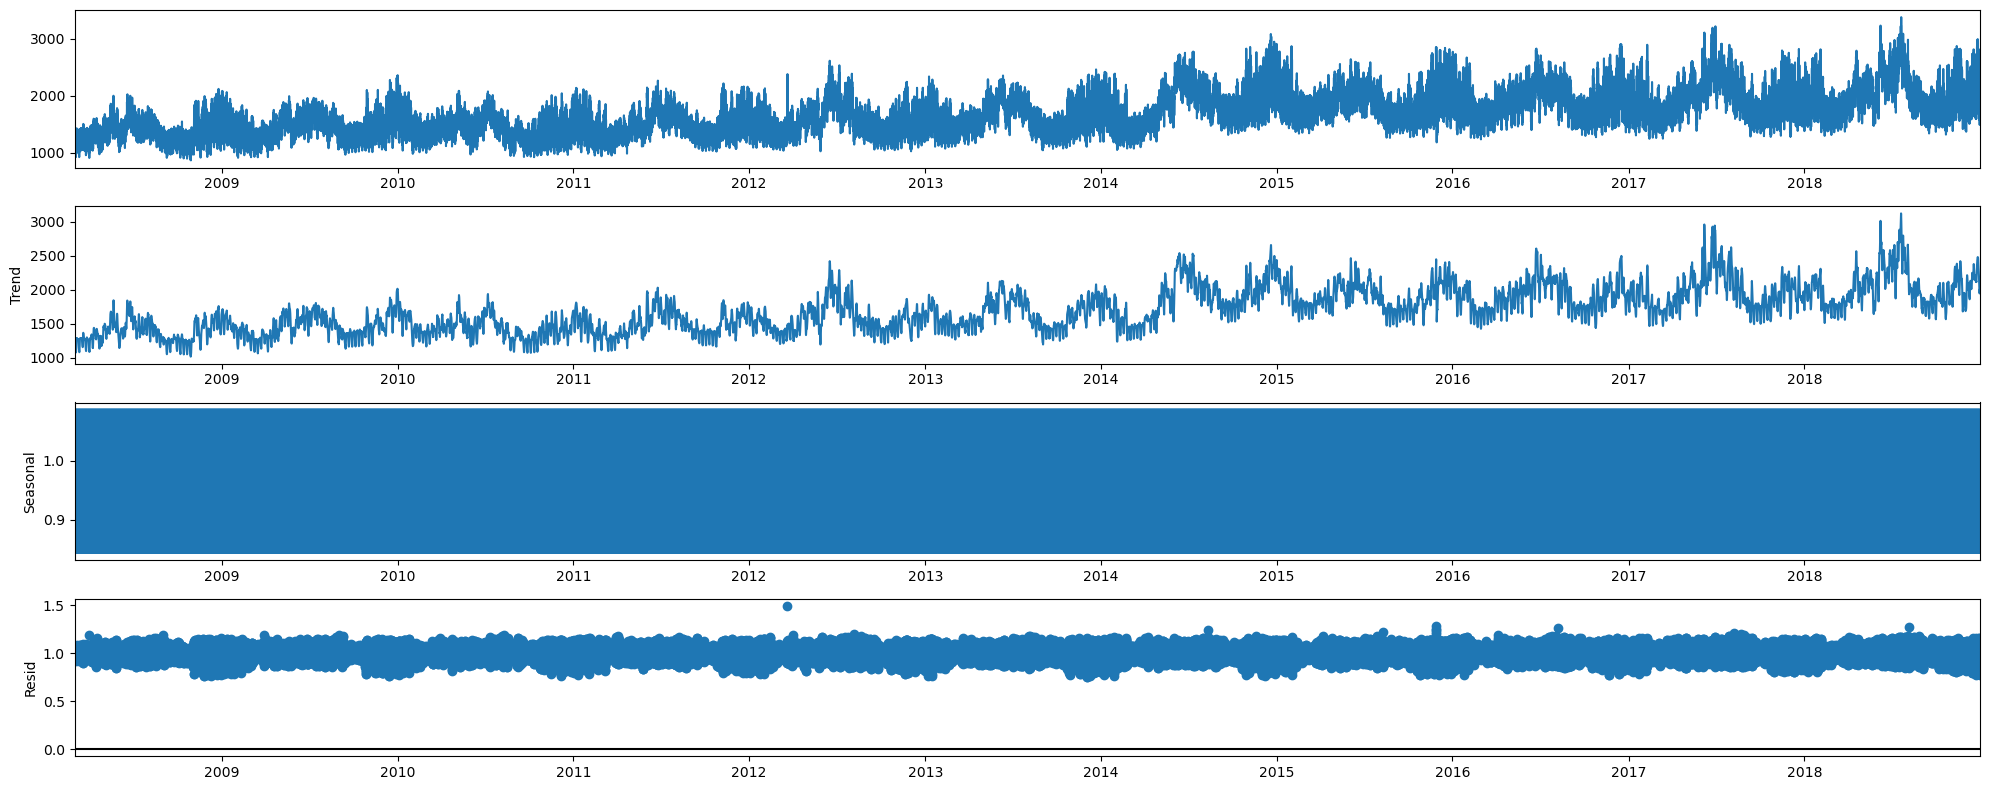

In [97]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [98]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(24),'\n')
print('Seasonality','\n',seasonality.head(24),'\n')
print('Residual','\n',residual.head(24),'\n')

Trend 
 datetime
2008-03-01 00:00:00            NaN
2008-03-01 01:00:00            NaN
2008-03-01 02:00:00            NaN
2008-03-01 03:00:00            NaN
2008-03-01 04:00:00            NaN
2008-03-01 05:00:00            NaN
2008-03-01 06:00:00            NaN
2008-03-01 07:00:00            NaN
2008-03-01 08:00:00            NaN
2008-03-01 09:00:00            NaN
2008-03-01 10:00:00            NaN
2008-03-01 11:00:00            NaN
2008-03-01 12:00:00    1261.995480
2008-03-01 13:00:00    1259.766156
2008-03-01 14:00:00    1259.061844
2008-03-01 15:00:00    1257.950062
2008-03-01 16:00:00    1256.548813
2008-03-01 17:00:00    1254.780656
2008-03-01 18:00:00    1252.037156
2008-03-01 19:00:00    1246.920750
2008-03-01 20:00:00    1239.440656
2008-03-01 21:00:00    1232.084094
2008-03-01 22:00:00    1226.248625
2008-03-01 23:00:00    1221.517562
Name: trend, dtype: float64 

Seasonality 
 datetime
2008-03-01 00:00:00    0.947654
2008-03-01 01:00:00    0.897327
2008-03-01 02:00:00    0.8

For the multiplicative series, we see that a lot of residuals are located around 1.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -13.600
DF test p-value is 2.701334903350695e-21
Number of lags used 67


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [21]:
# dftest = adfuller(df.diff().dropna(),regression='ct')  # .diff() is by default .diff(1), 1st order difference
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])

DF test statistic is -9.267
DF test p-value is 9.130089570109715e-14
Number of lags used 10


Now, let us go ahead and plot the stationary series.

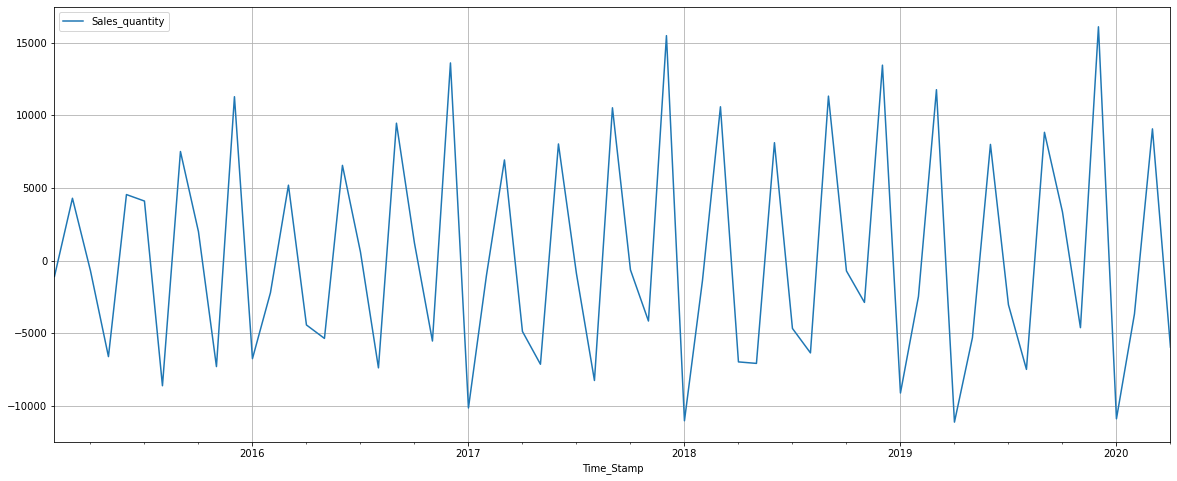

In [22]:
# df.diff().dropna().plot(grid=True);

In [45]:
df1=df.copy()

In [57]:
df=df1.copy()

In [26]:
import numpy as np
df["energy"] = np.log1p(df["energy"])

In [46]:
df["energy"] = df["energy"]**(1/2)

In [52]:
df["energy"] = 1/df["energy"]

In [59]:
from scipy.stats import boxcox
df["energy"], lam = boxcox(df["energy"])
#lam is the best lambda for the distribution

In [78]:
lam

0.9117143659321544

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

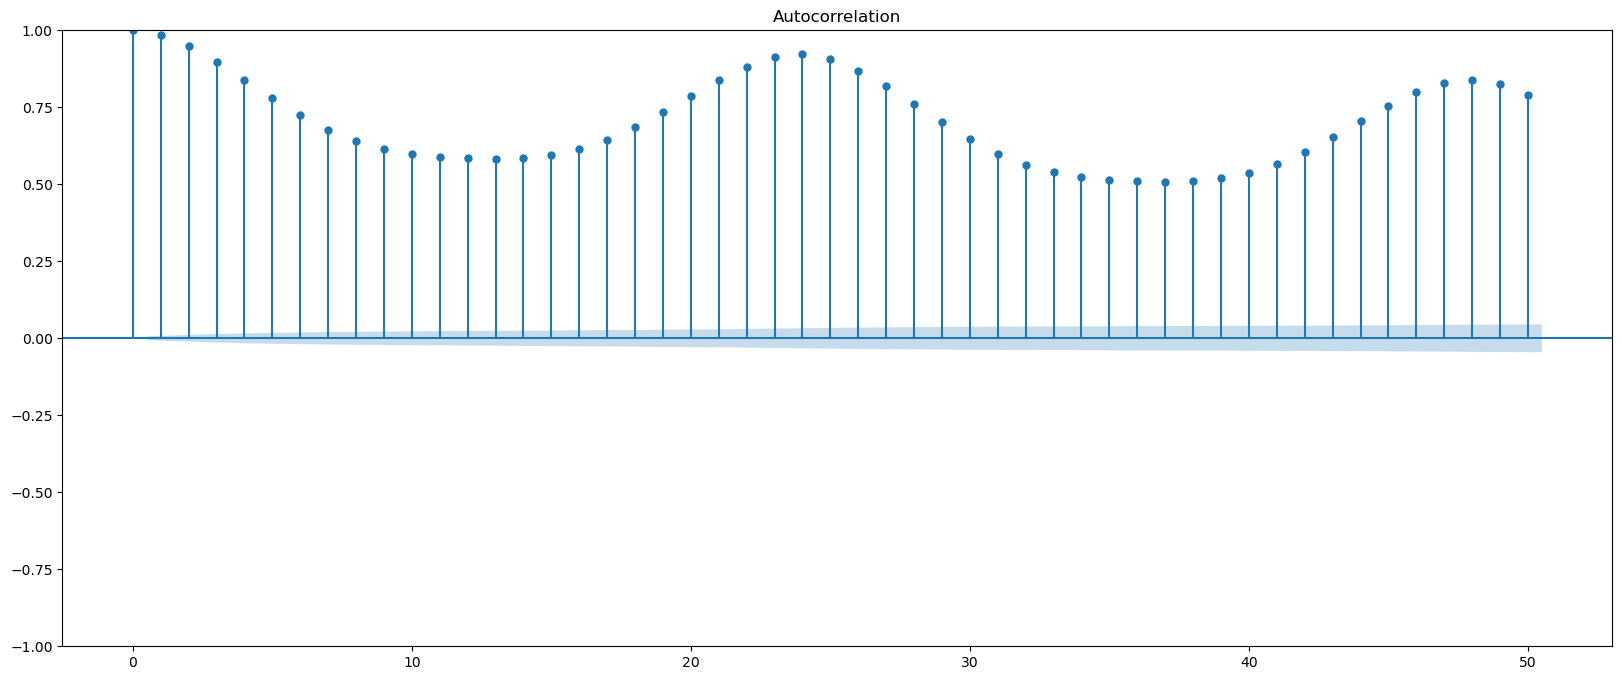

In [101]:
plot_acf(df);

From the above plots, we can say that there seems to be a seasonality in the data.

q=3

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


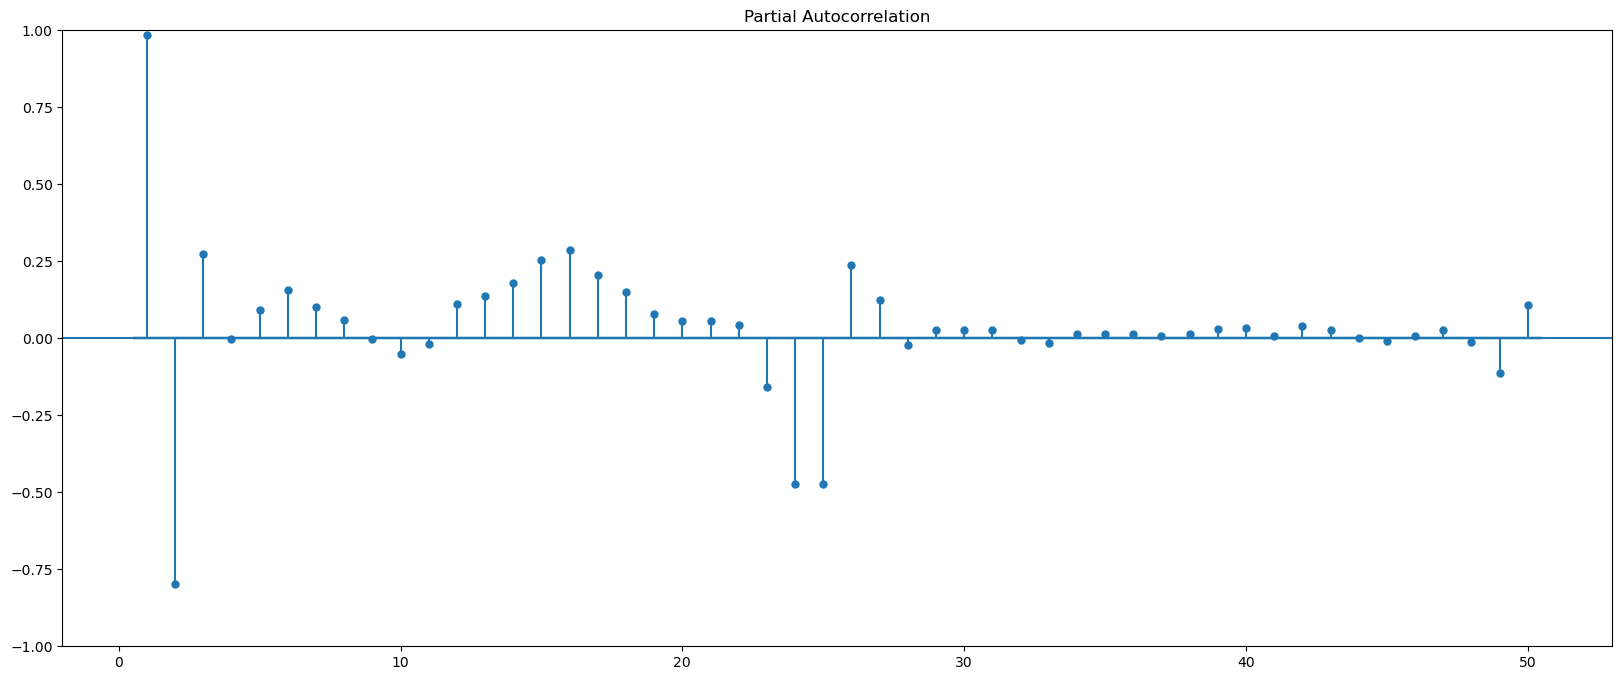

In [102]:
plot_pacf(df,zero=False);

p=1

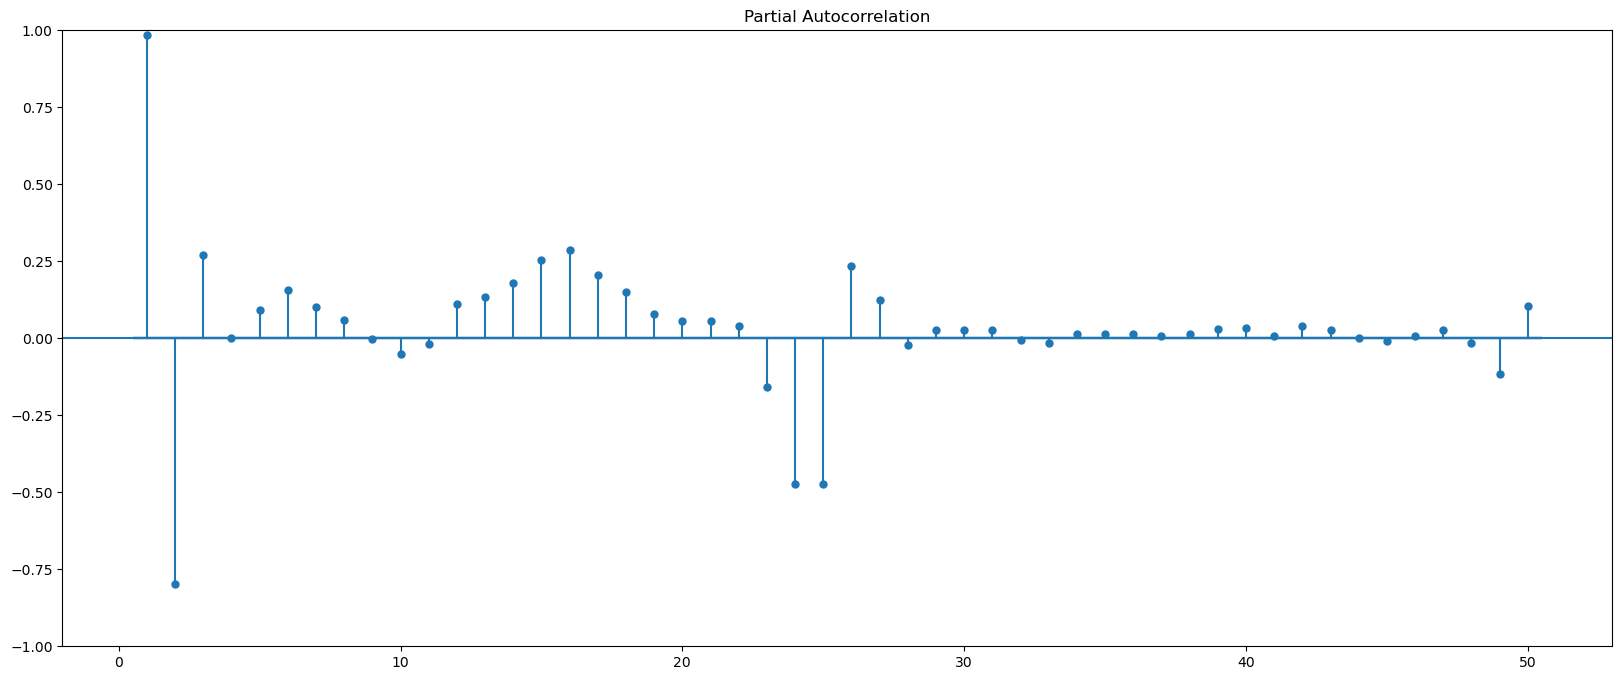

In [103]:
plot_pacf(df,zero=False,method='ywmle');

p=1

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [27]:
df.index.year.unique()

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Time_Stamp')

In [105]:
train = df.copy() 
# test = df[df.index>'2019']

In [29]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620


Last few rows of Training Data


,Sales_quantity
Time_Stamp,
2018-08-31,12045
2018-09-30,23358
2018-10-31,22644
2018-11-30,19765
2018-12-31,33207


First few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-01-31,24096
2019-02-28,21624
2019-03-31,33379
2019-04-30,22265
2019-05-31,16967


Last few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509
2020-03-31,32569
2020-04-30,26615


In [65]:
print(train.shape)
# print(test.shape)

(94992, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

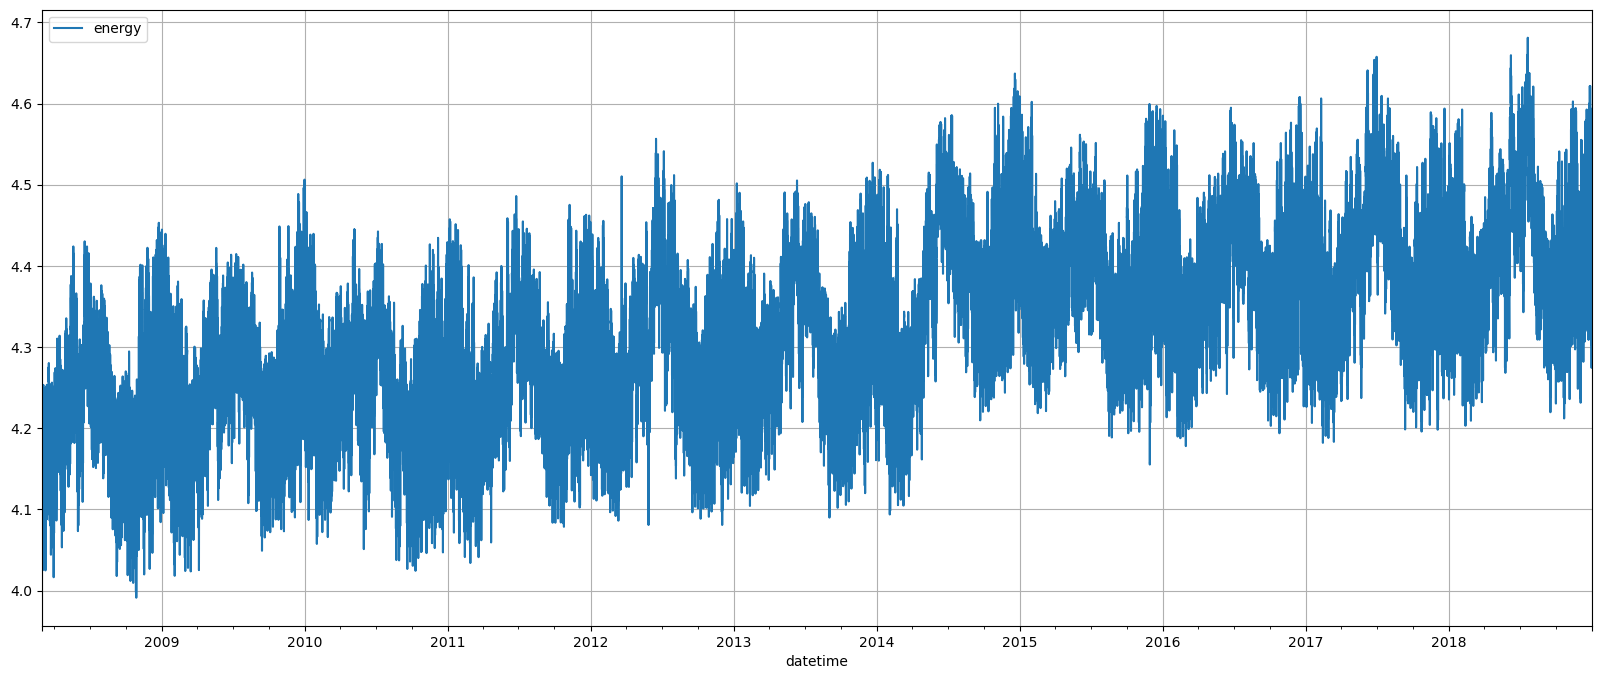

In [66]:
train.plot(grid=True);

In [67]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -13.929
DF test p-value is 1.2736464860548804e-21
Number of lags used 67


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [31]:
# dftest = adfuller(train.diff().dropna(),regression='ct')
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])

DF test statistic is -10.821
DF test p-value is 4.9223220486542666e-17
Number of lags used 10


Now, let us go ahead and plot the differenced training data.

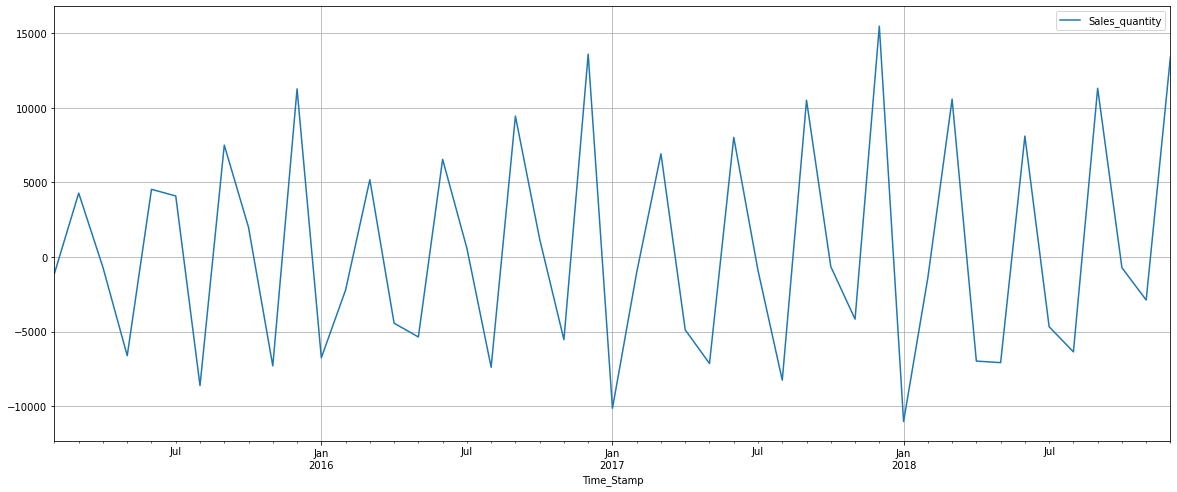

In [32]:
# train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sales_quantity  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [106]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [107]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [108]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['energy'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1054678.801667045


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 1) - AIC:987048.9650763121


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:962878.3796503673


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 3) - AIC:957140.8395646678


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 0) - AIC:963347.6951116412


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 1) - AIC:954786.4157399547


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:953981.8442623863


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 3) - AIC:953927.7074921274


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 0) - AIC:953410.2711505729


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:944825.2544599851


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - AIC:942676.2661888029


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 3) - AIC:942185.7560868846


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 0) - AIC:953308.1169331081


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 1) - AIC:953410.5912702848


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:944344.4415840455


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:936695.1281900584


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\891877791.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [110]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
15,"(3, 1, 3)",936695.128190
11,"(2, 1, 3)",942185.756087
10,"(2, 1, 2)",942676.266189
14,"(3, 1, 2)",944344.441584
9,"(2, 1, 1)",944825.254460


In [111]:
auto_ARIMA = ARIMA(train, order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                94992
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -468340.564
Date:                Sun, 20 Nov 2022   AIC                         936695.128
Time:                        16:19:29   BIC                         936761.359
Sample:                    03-01-2008   HQIC                        936715.274
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.4281      0.003    759.568      0.000       2.422       2.434
ar.L2         -1.9753      0.006   -327.186      0.000      -1.987      -1.963
ar.L3          0.5168      0.003    164.298      0.0

Diagnostics plot.

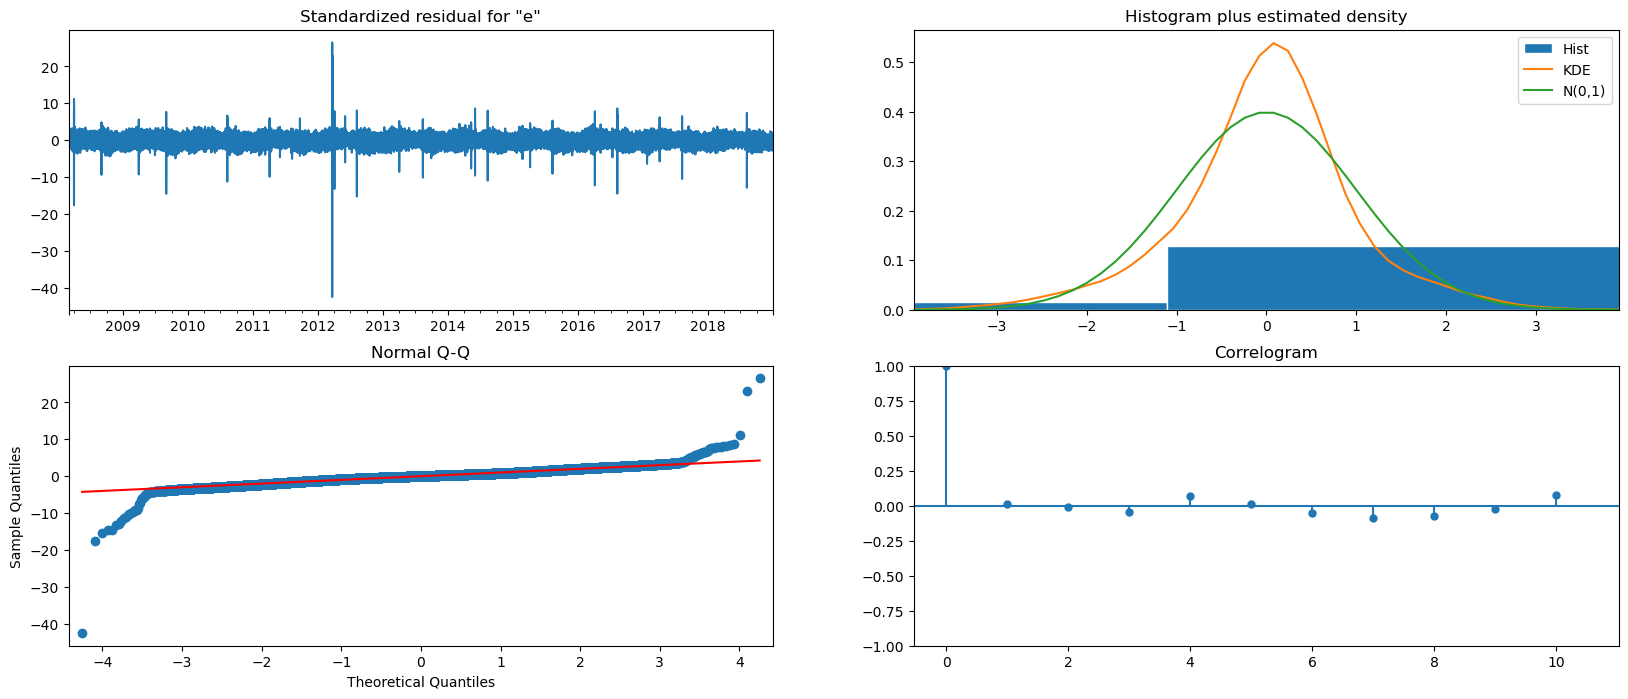

In [74]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [112]:
df1 = pd.read_csv('test_WudNWDM.csv',parse_dates=True,index_col='datetime')
# df1.drop('row_id',axis=1,inplace=True)
test=df1.copy()
df1.head()

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


In [113]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA

2019-01-01 00:00:00    1996.022408
2019-01-01 01:00:00    1850.236024
2019-01-01 02:00:00    1741.007215
2019-01-01 03:00:00    1668.569837
2019-01-01 04:00:00    1633.102254
                          ...     
2021-12-31 19:00:00    2119.761300
2021-12-31 20:00:00    2119.761300
2021-12-31 21:00:00    2119.761300
2021-12-31 22:00:00    2119.761300
2021-12-31 23:00:00    2119.761300
Freq: H, Name: predicted_mean, Length: 26304, dtype: float64

In [114]:
# from scipy.special import boxcox, inv_boxcox
# df1['energy'] = inv_boxcox(predicted_auto_ARIMA, lam)
# df1

In [116]:
# df2=df1.copy()
# df2

In [117]:
df1['energy'] = predicted_auto_ARIMA
df1

,row_id,energy
datetime,,
2019-01-01 00:00:00,94993,1996.022408
2019-01-01 01:00:00,94994,1850.236024
2019-01-01 02:00:00,94995,1741.007215
2019-01-01 03:00:00,94996,1668.569837
2019-01-01 04:00:00,94997,1633.102254
...,...,...
2021-12-31 19:00:00,121292,2119.761300
2021-12-31 20:00:00,121293,2119.761300
2021-12-31 21:00:00,121294,2119.761300


In [119]:
df1.set_index('row_id',inplace=True)
df1

,energy
row_id,
94993,1996.022408
94994,1850.236024
94995,1741.007215
94996,1668.569837
94997,1633.102254
...,...
121292,2119.761300
121293,2119.761300
121294,2119.761300


In [120]:
df1.to_csv("file1.csv")

In [41]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [42]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4400.53713677271 
MAPE: 14.606968423248961


In [43]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

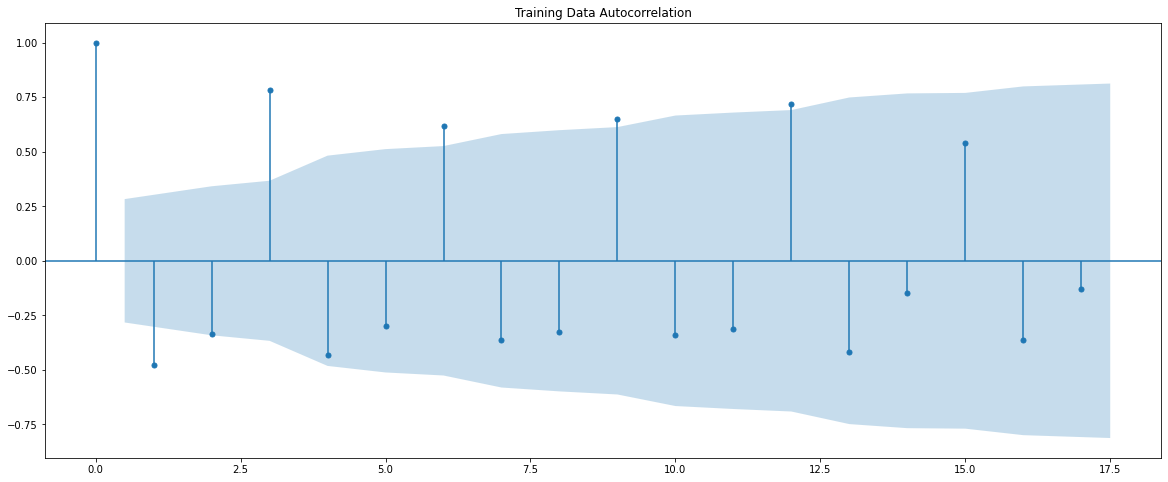

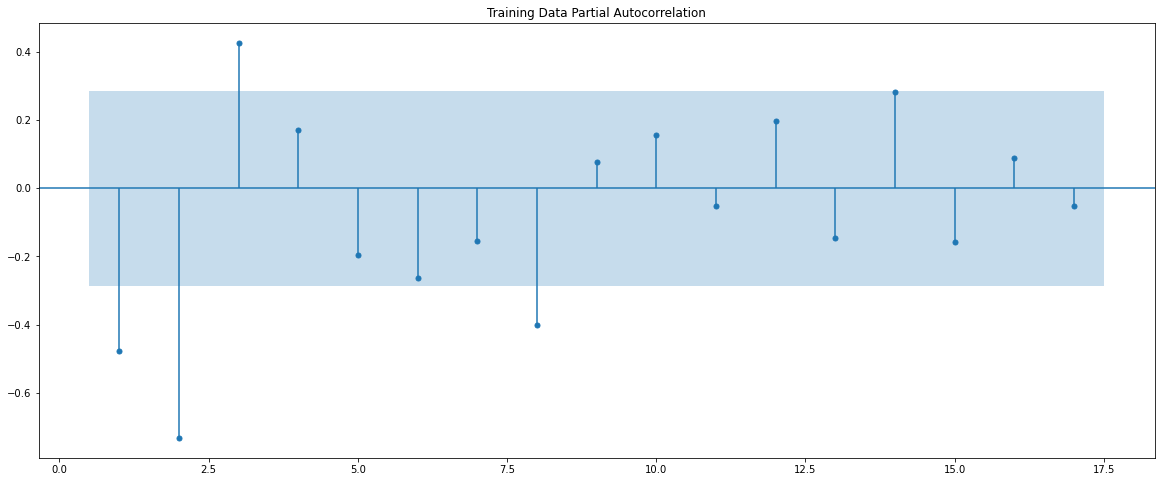

In [44]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [45]:
manual_ARIMA = ARIMA(train['Sales_quantity'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -451.002
Date:                Tue, 23 Feb 2021   AIC                            916.004
Time:                        07:50:59   BIC                            928.955
Sample:                    01-31-2015   HQIC                           920.878
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3030      0.353     -0.857      0.391      -0.996       0.390
ar.L2         -0.2931      0.337     -0.870      0.384      -0.954       0.367
ar.L3          0.6590      0.343      1.921      0.0

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Let us analyse the residuals from the various diagnostics plot.

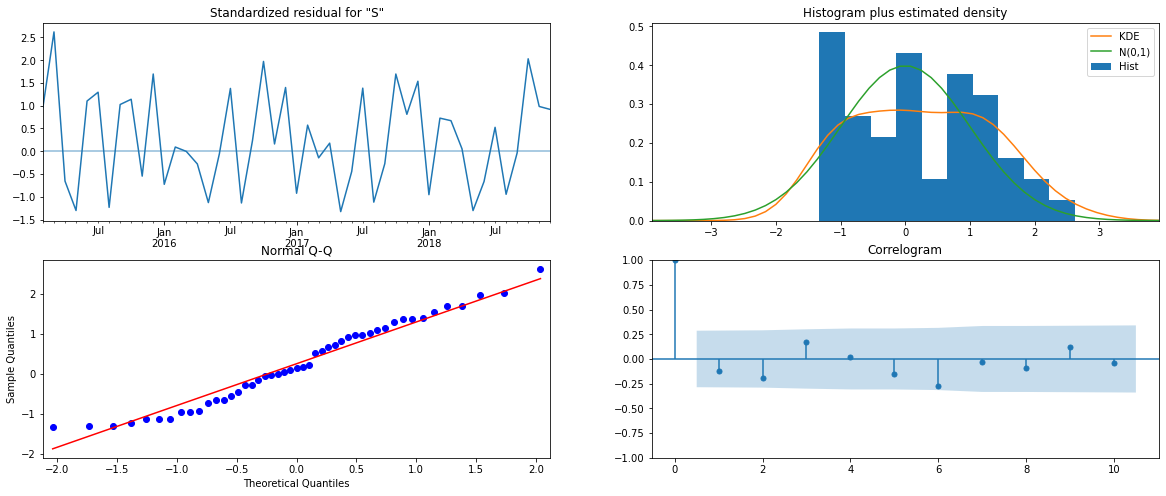

In [46]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [47]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [48]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4094.9687711451666 
MAPE: 14.383638958926545


In [49]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

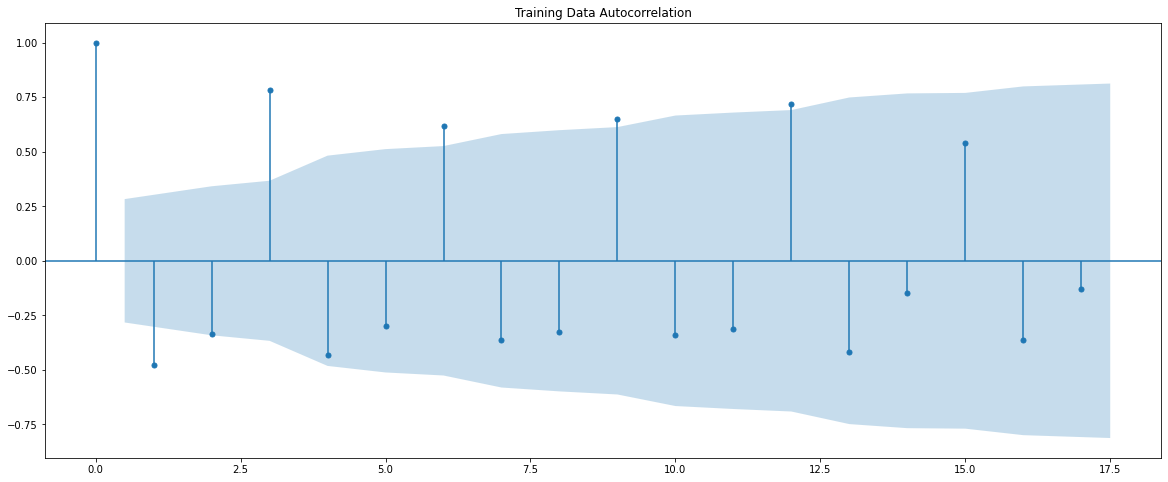

In [50]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We wont take 3 as q=3 already. Same value would give error, a limitation of model.

In [121]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)   # D=0, we aint doing any seasonal differencing
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [122]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['energy'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)  # enforce_invertibility=False: we predict y using x, but we dont wan to ptredict back x, using y
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1054661.739209183


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1040777.474571227


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1040681.9738943875


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1026841.8233086239


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1046146.5486629882


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1040764.9402529524


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1009152.001063449


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:993602.2547000009


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1040602.5313914055


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1037451.9330291501


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:993656.6545855148


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:993594.9727536883


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1016706.3367628156


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:957033.7563636177


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:940392.2403787314


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:901456.2614762951


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:987018.2853860026


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:982475.1999558787


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:982237.6318233565


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:974392.7970321067


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:983658.4253561127


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:982371.9625163255


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:953014.3448946482


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:943110.4706588562


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:982091.4723723927


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:981439.886202385


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:941480.7355985862


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:943096.9865688931


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:973574.391374285


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:926271.630669342


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:918205.0178105781


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:876737.3119537676


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:962836.4762700236


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:959697.5910765972


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:959528.2689874101


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:954192.073927233


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:960280.3243887294


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:959633.5923429144


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:936684.8643388944


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:928972.8389879614


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:959361.4144356358


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:952063.8136664678


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:923760.7973574793


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:928979.4056379992


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:963741.9331324252


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:918783.3782081016


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:913453.4661789039


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:872811.3736626112


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:957090.4931389632


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:955660.5807788691


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:955488.9666076902


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:951803.8668355641


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:955902.9483615075


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:936471.1573222332


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:931733.3823824871


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:925125.0611748991


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:955387.738612


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:935295.333213449


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:920630.7732794539


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:925130.4972798239


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:953260.7643818273


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:917368.2695806639


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:912910.9140505224


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:872804.2417610784


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:963330.2893313981


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:960821.0738978175


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:960537.4706059862


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:953022.3239910546


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:960568.9574113104


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:934926.8271980118


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:928945.3543148853


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:924813.9318176904


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:960322.345640176


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:937128.8156057892


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:922171.6004243074


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:930958.1859546847


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:958123.7731482803


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:920450.6516196922


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:917017.3950159561


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:876187.0625462594


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:954753.9409635238


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:953237.6663799846


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:953165.8763348575


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:949111.9665407814


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:953224.876255869


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:932155.8529487764


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:927448.35844738


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:922994.42913758


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:953169.8874838684


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:930451.6994388994


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:920949.0212504703


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:922999.2283146362


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:951660.2821581156


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:918158.147185755


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:914207.2722746996


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:873903.3822840756


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:953940.0015782422


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:952554.6717878516


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:952501.2581613646


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:948426.4943334332


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:952615.4322610213


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:932089.0176434224


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:927362.6837817153


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:922985.3594287386


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:952529.2915679758


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:934814.1150894137


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:937148.3277123021


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:922995.5538764026


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:951104.7512157934


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:917657.2145887736


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:913196.0816201577


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:872813.0607870164


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:953876.8087750012


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:952535.3667657777


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:952481.3643043826


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:948406.1599832624


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:952609.0206785911


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:931902.5579514252


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:927356.234843617


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:922903.4253026638


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:952516.099162524


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:930302.2443684535


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:920691.9984916566


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:922906.1844496602


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:951104.4652803116


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:917140.5592572023


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:912645.978975429


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:871700.4002988843


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:953378.1974356609


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:952295.2154924663


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:952220.8376858637


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:948290.9306236106


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:952355.6321911371


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:932547.96404122


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:927627.0840575557


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:923123.7353100465


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:952177.6343290771


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:930781.8152590623


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:918913.578971432


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:923130.2811743446


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:950979.55699929


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:917877.6589856717


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:913576.4640116066


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:872719.4045907463


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:944799.2376391463


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:944647.6543108828


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:944463.0322447683


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:941176.2688910703


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:944636.1908675488


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:932126.8841345647


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:927237.185749917


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:922995.3591346589


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:944196.6928193311


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:930379.8932108044


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:905020.7862061973


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:914512.4805317943


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:950981.4407985064


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:917878.3583486868


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:913281.0262176001


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:872274.5224542504


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:942636.3945853113


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:942497.7735024578


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:942411.2690510437


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:938877.2852929014


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:942502.4745188619


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:923896.0716033675


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:915856.9879596337


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:914473.2731852523


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:942358.2343075913


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:919859.6614674148


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:904840.2044077034


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:914470.9578328589


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:942124.8597222383


C:\Users\cools\AppData\Local\Temp\ipykernel_8036\3258239473.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [55]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -211.970
Date:                           Tue, 23 Feb 2021   AIC                            445.940
Time:                                   07:53:27   BIC                            459.348
Sample:                               01-31-2015   HQIC                           449.659
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7612      0.159      4.788      0.000       0.450       1.073
ma.L1         -1.6438      0.797     -2.062

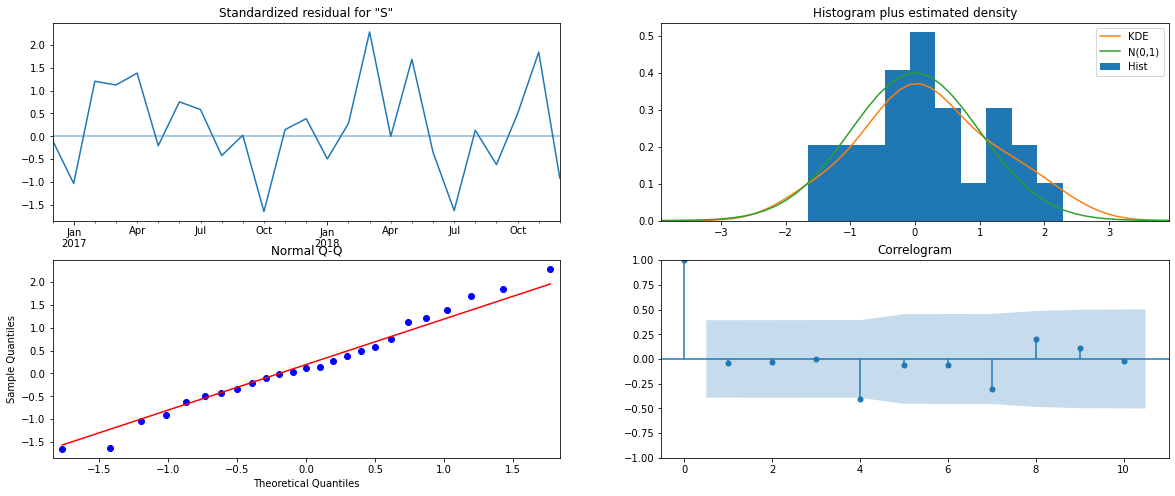

In [56]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [57]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [58]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()  # alpha=0.05 creates a 95% confidence interval band around the forecast

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-31,22676.761277,1047.327750,20624.036606,24729.485948
2019-02-28,20521.883906,1061.796822,18440.800375,22602.967437
2019-03-31,32957.006148,1076.174076,30847.743718,35066.268578
2019-04-30,25920.750467,1082.326248,23799.430001,28042.070932
2019-05-31,18636.242977,1084.345865,16510.964136,20761.521819


In [59]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2388.7557673810975 
MAPE: 7.939640007346174


In [60]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

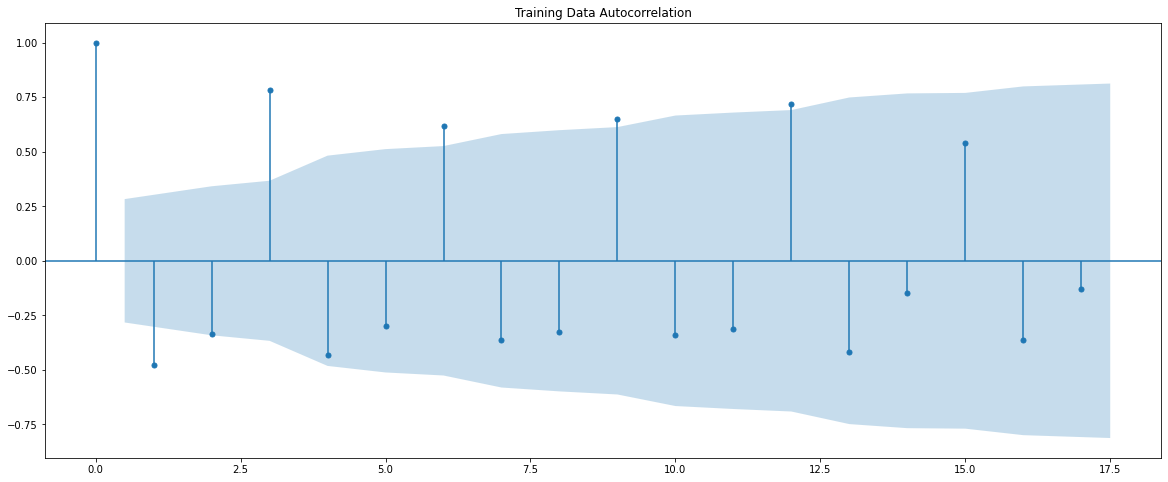

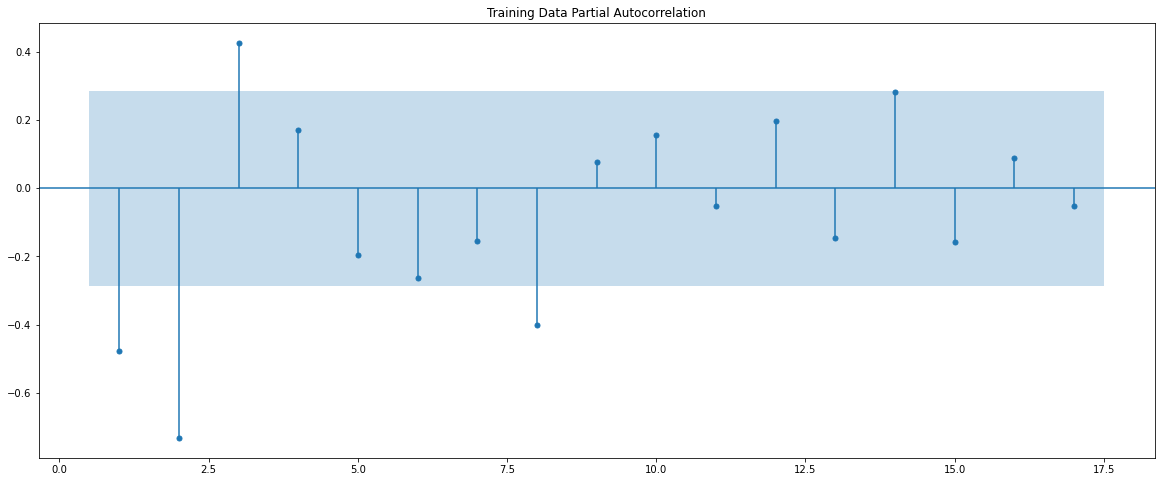

In [61]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

1st plot: Q=3 as every 3rd term is significant.

2nd plot: P=0 as we aint able to see any seasonal repetations.

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We wont take 3 as q=3 already. Same value would give error, a limitation of model.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [62]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -229.624
Date:                           Tue, 23 Feb 2021   AIC                            479.249
Time:                                   07:53:29   BIC                            491.437
Sample:                               01-31-2015   HQIC                           482.629
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4033      2.528     -0.160      0.873      -5.358       4.552
ar.L2         -0.3966      2.539     -0.156

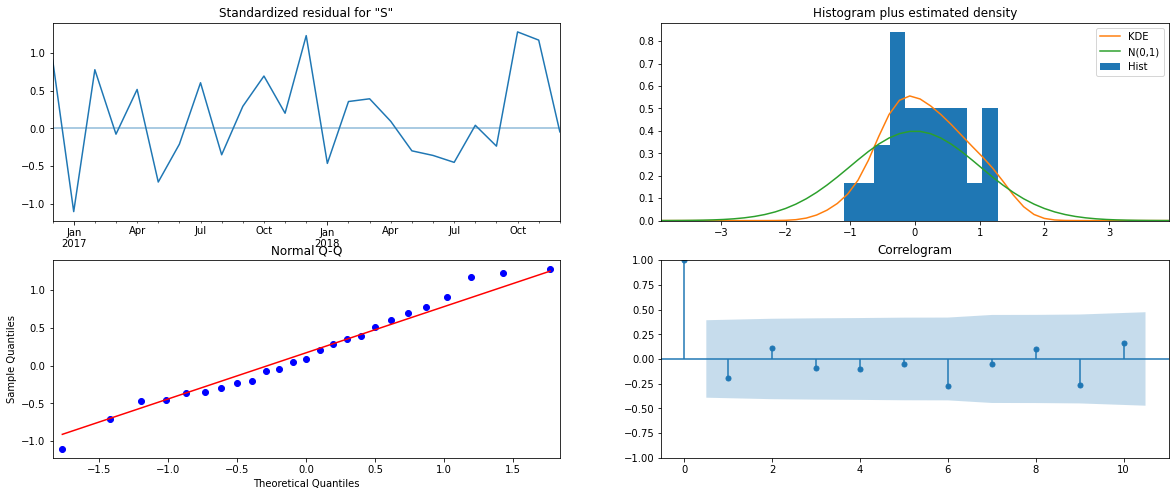

In [63]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [64]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [65]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2870.5384370887773 
MAPE: 9.367992796777662


In [66]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [67]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sales_quantity'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   64
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -942.380
Date:                           Tue, 23 Feb 2021   AIC                           1906.761
Time:                                   07:53:32   BIC                           1925.610
Sample:                               01-31-2015   HQIC                          1913.625
                                    - 04-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5435         -0        inf      0.000      -0.544      -0.544
ma.L1         -0.0418         -0        inf

/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ssps/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [69]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [70]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-05-31,20425.332965,3.829299e+09,-7.505267e+09,7.505308e+09
2020-06-30,26541.783749,4.145468e+09,-8.124941e+09,8.124994e+09
2020-07-31,25800.207886,4.336102e+09,-8.498578e+09,8.498630e+09
2020-08-31,16512.601434,5.321891e+09,-1.043070e+10,1.043073e+10
2020-09-30,25705.273683,5.721109e+09,-1.121314e+10,1.121319e+10


In [71]:
rmse = mean_squared_error(df['Sales_quantity'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 4647.431429119808


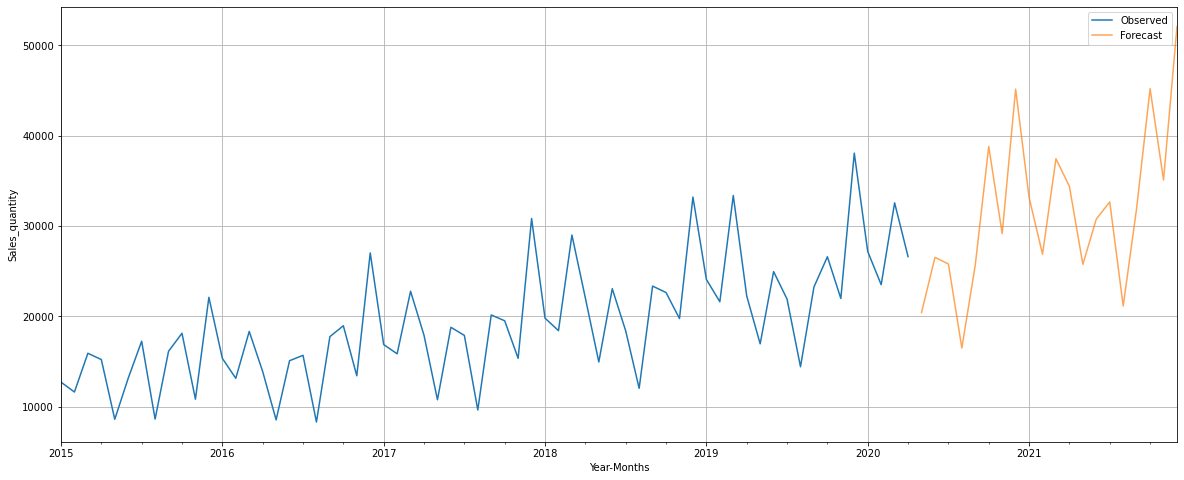

In [72]:
axis = df['Sales_quantity'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537137,14.606968
"ARIMA(3,1,3)",4094.968771,14.383639
"SARIMA(1,1,3)(3,0,3,6)",2388.755767,7.939640
"SARIMA(3,1,3)(0,0,3,6)",2870.538437,9.367993


# END